<a href="https://colab.research.google.com/github/SalNel97/qmss_python_hw2/blob/main/sne2114_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QMSS S5073**
# ***Homework 2***
**Salah El-Sadek (sne2114)**

---

In [186]:
# Importing relevant libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl

from sklearn.pipeline import make_pipeline

##***Part 1***

### **1.0:** 
*Find the url for the California Test Score Data Set from the following website:*

https://vincentarelbundock.github.io/Rdatasets/datasets.html

*Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.*

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

*The target data (i.e. the dependent variable) is named "testscr".  You can use all  variables in the data except for "readscr" and "mathscr" in the following analysis.  (These two variables were used to generate the dependent variable).*

In [187]:
#Reading in data
df1 = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
df1.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [188]:
df1.dtypes

Unnamed: 0      int64
distcod         int64
county         object
district       object
grspan         object
enrltot         int64
teachers      float64
calwpct       float64
mealpct       float64
computer        int64
testscr       float64
compstu       float64
expnstu       float64
str           float64
avginc        float64
elpct         float64
readscr       float64
mathscr       float64
dtype: object



---


Deleting non-numeric columns along with the first column, 'distcod', and the 'readscr' and 'mathscr' columns. Also deleting the 'enrltot' and 'teachers' column, since they are already represented in the student-to-teacher ratio variable 'str' and that could pose a collinearity problem.


---



In [189]:
df1_sub = df1.iloc[:, [7,8,9,10,11,12,13,14,15]]
df1_sub.head()

,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


### **1.1:**
*Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.*



---


Choosing 'str', 'avginc', and 'expnstu' as my 3 continuous variables.


---



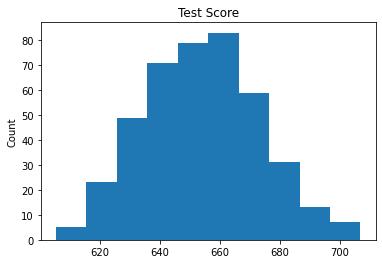

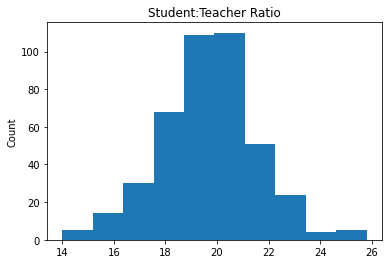

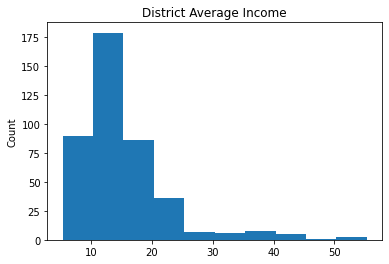

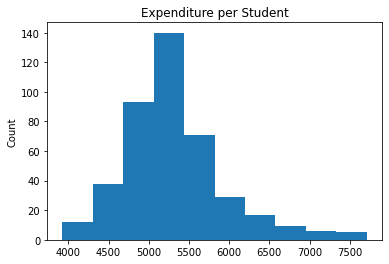

In [190]:
import matplotlib.pyplot as plt

#Test Score Histogram
plt.hist(data = df1_sub, x = 'testscr')
plt.ylabel('Count')
plt.title('Test Score')

plt.show()

#Student;Teacher ratio histogram
plt.hist(data = df1_sub, x = 'str')
plt.ylabel('Count')
plt.title('Student:Teacher Ratio')

plt.show()

#District average income histogram
plt.hist(data = df1_sub, x = 'avginc')
plt.ylabel('Count')
plt.title('District Average Income')

plt.show()

#Expenditure per student histogram
plt.hist(data = df1_sub, x = 'expnstu')
plt.ylabel('Count')
plt.title('Expenditure per Student')

plt.show()

### **1.2:**
*Visualize the dependency of the target on each feature from 1.1.*

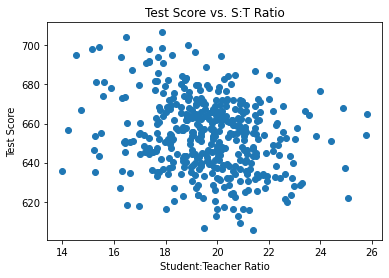

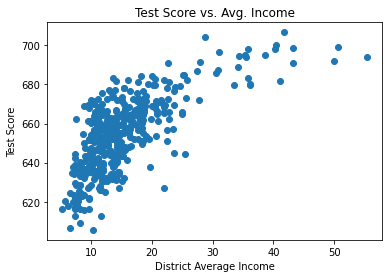

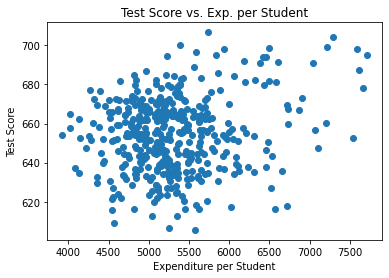

In [191]:

plt.scatter(data = df1_sub, x = 'str', y = 'testscr')
plt.xlabel('Student:Teacher Ratio')
plt.ylabel('Test Score')
plt.title('Test Score vs. S:T Ratio')

plt.show()

plt.scatter(data = df1_sub, x = 'avginc', y = 'testscr')
plt.xlabel('District Average Income')
plt.ylabel('Test Score')
plt.title('Test Score vs. Avg. Income')

plt.show()

plt.scatter(data = df1_sub, x = 'expnstu', y = 'testscr')
plt.xlabel('Expenditure per Student')
plt.ylabel('Test Score')
plt.title('Test Score vs. Exp. per Student')


plt.show()

### **1.3:**
*Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?*

In [192]:
from sklearn.model_selection import train_test_split

y = df1_sub['testscr']
X = df1_sub.loc[:, df1_sub.columns != 'testscr']

print(y[0:5])
X.head()

0    690.799988
1    661.200012
2    643.599976
3    647.700012
4    640.849976
Name: testscr, dtype: float64


,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


**Train-test splitting our data.**

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(y_train[0:5])
X_train.head()

81     635.750000
300    665.349976
415    704.300049
113    640.750000
250    659.349976
Name: testscr, dtype: float64


,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
81,29.9363,93.630600,8,0.025478,6118.710449,16.311687,7.385000,13.057324
300,5.4864,24.747101,326,0.126898,5400.000000,18.615942,17.369446,15.336707
415,0.1016,3.556900,195,0.198171,7290.338867,16.474134,28.716999,5.995935
113,12.2791,71.023804,499,0.076557,5172.019531,19.626617,14.242901,43.494938
250,4.0395,31.370899,224,0.097603,4631.243652,22.281553,14.603000,13.986929


####**KNN Regression and Cross Validation**

In [194]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

#Print accuracy rounded to two decimal places
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

accuracy: 0.21


In [281]:
kfold = KFold(n_splits=5)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

print("KFold:\n{}".format(
cross_val_score(KNeighborsRegressor(n_neighbors=5), X_train, y_train, cv=kfold).mean()))

print("RepeatedKFold:\n{}".format(
cross_val_score(KNeighborsRegressor(n_neighbors=5), X_train, y_train, cv=rkf).mean()))

# Could not conduct stratified k-fold since our target variable is continuous

KFold:
0.1556942332254682
RepeatedKFold:
0.12566822976836378


**Using StandardScaler()**

In [196]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))

knn_pipe.fit(X_train, y_train)
knn_pipe.score(X_test, y_test)

0.7324525914506206



---


We see a significant improvement in our r2 score (compared to that of CV) when scaling our data using StandardScaler().


---



####**Linear (OLS) Regression and CV**

In [197]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

lr.coef_: [-1.32150840e-01 -3.30737941e-01 -5.12590333e-04  1.27954536e+01
  1.95681888e-03 -1.90768794e-01  6.10450690e-01 -2.06547163e-01]
lr.intercept_: 656.8128074340533
Number of features used: 8


In [282]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# Using CV to get an average r2 score value for our model
print("CV score: {:.3f}".format(cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring='r2').mean()))

Training set score: 0.81
Test set score: 0.80
CV score: 0.781


**Using StandardScaler()**

In [199]:
lr_pipe = make_pipeline(StandardScaler(), LinearRegression())

lr_pipe.fit(X_train, y_train)
lr_pipe.score(X_test, y_test)

0.8007428276308416



---


Little to no improvement in our r2 score (compared to that of CV) when we scale using StandardScaler().


---



####**Ridge Regression and CV**

In [200]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("ridge.coef_: {}".format(ridge.coef_))
print("ridge.intercept_: {}".format(ridge.intercept_))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

ridge.coef_: [-1.38346301e-01 -3.29675285e-01 -4.31730828e-04  6.67994401e+00
  2.06825258e-03 -2.39309651e-01  6.09451144e-01 -2.11324005e-01]
ridge.intercept_: 658.1112277865584
Number of features used: 8


In [283]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# Using CV to get an average r2 score value for our model
print("CV score: {:.3f}".format(cross_val_score(Ridge(), X_train, y_train, cv=10, scoring='r2').mean()))

Training set score: 0.81
Test set score: 0.80
CV score: 0.781


**Using StandardScaler()**

In [202]:
ridge_pipe = make_pipeline(StandardScaler(), Ridge())

ridge_pipe.fit(X_train, y_train)
ridge_pipe.score(X_test, y_test)

0.8001192232310499



---


Little to no improvement in our r2 score (compared to that of CV) when we scale using StandardScaler().


---



####**Lasso Regression and CV**

In [203]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("lasso.coef_: {}".format(lasso.coef_))
print("lasso.intercept_: {}".format(lasso.intercept_))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso.coef_: [-1.31373867e-01 -3.43282869e-01 -5.64140035e-04  0.00000000e+00
  2.78345192e-03 -0.00000000e+00  5.73054934e-01 -2.08622824e-01]
lasso.intercept_: 651.6030972255916
Number of features used: 6




---


We can see here that compared to OLS and Ridge regression (which both used 8 independent variables in their models), Lasso regression yields a more sparse model that only uses 6 independent variables instead.


---



In [284]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

print("CV score: {:.3f}".format(cross_val_score(Lasso(), X_train, y_train, cv=10, scoring='r2').mean()))

Training set score: 0.81
Test set score: 0.80
CV score: 0.781


**Using StandardScaler()**

In [205]:
lasso_pipe = make_pipeline(StandardScaler(), Lasso())

lasso_pipe.fit(X_train, y_train)
lasso_pipe.score(X_test, y_test)

0.7942522109680937

### **1.4:**
*Tune the parameters of the models where possible using GridSearchCV. Do the results improve?*

####**For KNN Regression**

In [206]:
from sklearn.model_selection import GridSearchCV

p_grid_knn = {'kneighborsregressor__n_neighbors': [1,3,5,7,9,11,13,15]}

grid_knn = GridSearchCV(knn_pipe, p_grid_knn, cv=10)
grid_knn.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))
print("test-set score: {:.3f}".format(grid_knn.score(X_test, y_test)))

best mean cross-validation score: 0.752
best parameters: {'kneighborsregressor__n_neighbors': 11}
test-set score: 0.695




---


Our ideal k number of neighbors appears to be 11 rather than the default of 5. Our r2 scores are also much better than before we tuned for parameters.


---



####**For Ridge Regression**

In [207]:
p_grid_rid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_rid = GridSearchCV(ridge_pipe, p_grid_rid, cv=10)
grid_rid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_rid.best_score_))
print("best parameters: {}".format(grid_rid.best_params_))
print("test-set score: {:.3f}".format(grid_rid.score(X_test, y_test)))

best mean cross-validation score: 0.782
best parameters: {'ridge__alpha': 10}
test-set score: 0.795




---


Our ideal tuning parameter for our Ridge model is lambda = 10, compared to the default value of 1. No significant improvement to our r2 scores after tuning for parameters.


---



####**For Lasso Regression**

In [208]:
p_grid_las = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_las = GridSearchCV(lasso_pipe, p_grid_las, cv=10)
grid_las.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_las.best_score_))
print("best parameters: {}".format(grid_las.best_params_))
print("test-set score: {:.3f}".format(grid_las.score(X_test, y_test)))

best mean cross-validation score: 0.781
best parameters: {'lasso__alpha': 0.1}
test-set score: 0.801




---


Our ideal tuning parameter for our Lasso model is lambda = 0.1, compared to the default of 1. No significant improvement to our r2 scores after tuning for parameters.


---



### **1.5:**
*Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?*

**Ridge Model**

In [209]:
print("ridge.coef_: {}".format(ridge.coef_))
print("ridge.intercept_: {}".format(ridge.intercept_))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

ridge.coef_: [-1.38346301e-01 -3.29675285e-01 -4.31730828e-04  6.67994401e+00
  2.06825258e-03 -2.39309651e-01  6.09451144e-01 -2.11324005e-01]
ridge.intercept_: 658.1112277865584
Number of features used: 8


**Lasso Model**

In [210]:
print("lasso.coef_: {}".format(lasso.coef_))
print("lasso.intercept_: {}".format(lasso.intercept_))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso.coef_: [-1.31373867e-01 -3.43282869e-01 -5.64140035e-04  0.00000000e+00
  2.78345192e-03 -0.00000000e+00  5.73054934e-01 -2.08622824e-01]
lasso.intercept_: 651.6030972255916
Number of features used: 6




---


We see that our Lasso model is more sparse with only 6 predictors used compared to the Ridge model's 8. One could see from the coefficient values that the Lasso model resulted in 2 of the predictors found in the Ridge model to be assigned a zero coefficient value, and thus eliminated from the model. Besides the zero coefficents, all other coefficients seem to be approximately similar with the same magnitude.

---



### **1.6:**
*Discuss which final model you would choose to predict new data.*



---

I would use the Lasso model since we did not have many predictor variables to start with, so having a more sparse model (compared to Ridge), since bias and MSE are in general smaller in Lasso when we have relatively few predictors.


---



##***Part 2***

###**2.0**
*First, import the red and the white wine csv files into separate pandas dataframes from the following website:*

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality

*(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')*

*Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine.  Combine both datasets into a single dataframe.*

*The target data (i.e. the dependent variable) is "winetype".*

**Reading in both datasets and adding the 'winetype' column to each.**

In [211]:
#Reading in red wine dataset and adding an extra column in which all the values in it equals to 1
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')
df_red['winetype'] = 1
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [212]:
#Reading in white wine dataset and adding an extra column in which all the values in it equals to 0
df_wht = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')
df_wht['winetype'] = 0
df_wht.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


**Now we append both datasets.**

In [213]:
df_tot = df_wht.append(df_red)

In [214]:
df_tot.head() # We can see that the first few values are from the white wine dataset (winetype = 0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [215]:
df_tot.tail() # We can see that the last few values are from the red wine dataset (winetype = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


In [216]:
reds = df_wht.shape[0]
whites = df_red.shape[0]
tots = df_tot.shape[0]

reds, whites, tots 
# We can see that the number of rows checks out and sums up correctly, indicating a combining was successful.

(4898, 1599, 6497)

###**2.1**
*Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.*

**Choosing 'residual sugar', 'fixed acidity', and 'volatile acidity' as my three explanatory variables.**

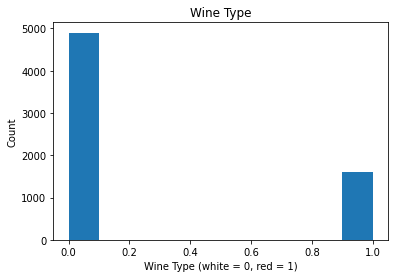

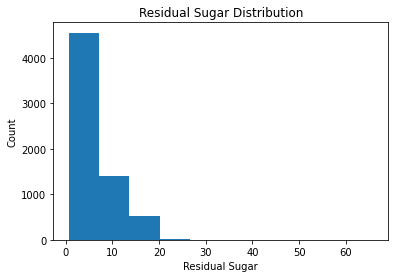

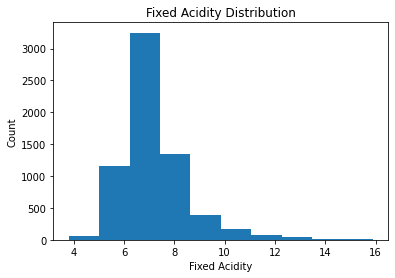

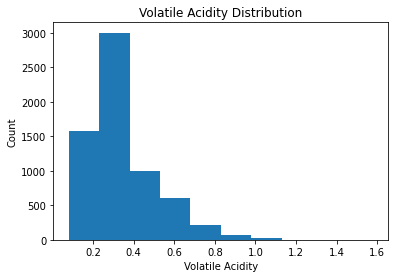

In [217]:
# Wine type histogram
plt.hist(data = df_tot, x = 'winetype')
plt.xlabel('Wine Type (white = 0, red = 1)')
plt.ylabel('Count')
plt.title('Wine Type')

plt.show()

# Residual sugar histogram
plt.hist(data = df_tot, x = 'residual sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Count')
plt.title('Residual Sugar Distribution')

plt.show()

# Fixed acidity histogram
plt.hist(data = df_tot, x = 'fixed acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Count')
plt.title('Fixed Acidity Distribution')

plt.show()

# Volatile acidity histogram
plt.hist(data = df_tot, x = 'volatile acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Count')
plt.title('Volatile Acidity Distribution')

plt.show()

###**2.2**
*Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?*

In [221]:
y1 = df_tot['winetype']
X1 = df_tot.loc[:, df_tot.columns != 'winetype']

print(y1[0:5])
X1.head()

0    0
1    0
2    0
3    0
4    0
Name: winetype, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Train-test splitting our data.**

In [251]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)

print(y1_train[0:5])
X1_train.head()

3731    0
1651    0
162     1
1303    0
474     0
Name: winetype, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3731,7.0,0.34,0.26,10.3,0.041,51.0,166.0,0.99382,3.08,0.35,11.6,6
1651,6.4,0.42,0.74,12.8,0.076,48.0,209.0,0.99780,3.12,0.58,9.0,6
162,7.8,0.53,0.04,1.7,0.076,17.0,31.0,0.99640,3.33,0.56,10.0,6
1303,8.2,0.20,0.36,8.1,0.035,60.0,163.0,0.99520,3.05,0.30,10.3,6
474,5.5,0.16,0.22,4.5,0.030,30.0,102.0,0.99380,3.24,0.36,9.4,6


####**KNN Classification and Cross Validation**

In [266]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X1_train, y1_train)

#Print accuracy rounded to two decimal places
print("accuracy: {:.2f}".format(knn1.score(X1_test, y1_test)))

accuracy: 0.94


In [267]:
from sklearn.model_selection import StratifiedKFold

kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

print("KFold:\n{}".format(
cross_val_score(KNeighborsClassifier(n_neighbors=5), X1_train, y1_train, cv=kfold).mean()))

print("StratifiedKFold:\n{}".format(
cross_val_score(KNeighborsClassifier(n_neighbors=5), X1_train, y1_train, cv=skfold).mean()))

print("RepeatedKFold:\n{}".format(
cross_val_score(KNeighborsClassifier(n_neighbors=5), X1_train, y1_train, cv=rkf).mean()))

KFold:
0.9392430895593114
StratifiedKFold:
0.9371890696572421
RepeatedKFold:
0.9380743852998475


**Using StandardScaler()**

In [256]:
knn1_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

knn1_pipe.fit(X1_train, y1_train)
knn1_pipe.score(X1_test, y1_test)

0.992



---


We see a slight improvement in our r2 score (compared to that of CV) when scaling our data using StandardScaler().


---



####**Unpenalized Logistic Regression and CV**

In [286]:
from sklearn.linear_model import LogisticRegression

# C=1 is default
ulogreg = LogisticRegression(penalty='none', max_iter=10000).fit(X1_train, y1_train)

print("logreg .coef_: {}".format(ulogreg.coef_))
print("logreg .intercept_: {}".format(ulogreg.intercept_))

logreg .coef_: [[  1.52298958  11.35414332  -1.35982429  -0.0779187   39.16447828
    0.05273353  -0.06700305 -21.57022861   9.86221811   8.19745305
   -0.37098538   0.14777283]]
logreg .intercept_: [-25.88109744]


In [287]:
print("Training set score: {:.3f}".format(ulogreg.score(X1_train, y1_train)))
print("Test set score: {:.3f}".format(ulogreg.score(X1_test, y1_test)))

print("CV score: {:.3f}".format(cross_val_score(LogisticRegression(penalty='none', max_iter=10000), X1_train, y1_train, cv=10, scoring='r2').mean()))

Training set score: 0.988
Test set score: 0.988
CV score: 0.940


**Using StandardScaler()**

In [288]:
ulog_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='none', max_iter=10000))

ulog_pipe.fit(X1_train, y1_train)
ulog_pipe.score(X1_test, y1_test)

0.9938461538461538



---


We see a slight improvement in our r2 score (compared to that of CV) when scaling our data using StandardScaler().


---



####**L2 Penalized Logistic Regression and CV**

In [290]:
# C=1 is default
plogreg = LogisticRegression(penalty='l2', max_iter=10000).fit(X1_train, y1_train)

print("logreg .coef_: {}".format(plogreg.coef_))
print("logreg .intercept_: {}".format(plogreg.intercept_))

logreg .coef_: [[ 1.14854374e+00  7.99778038e+00 -9.12464620e-01 -1.00443653e-01
   2.78749998e+00  4.30336003e-02 -5.69461547e-02  2.12801971e-01
   5.86020612e+00  5.55880797e+00 -5.00898736e-01  3.35662258e-03]]
logreg .intercept_: [-25.11987014]


In [ ]:
print("Training set score: {:.3f}".format(logreg.score(X1_train, y1_train)))
print("Test set score: {:.3f}".format(logreg.score(X1_test, y1_test)))

print("CV score: {:.3f}".format(cross_val_score(LogisticRegression(penalty='none', max_iter=10000), X1_train, y1_train, cv=10, scoring='r2').mean()))

Training set score: 0.988
Test set score: 0.988
CV score: 0.940


**Using StandardScaler()**

In [291]:
plog_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', max_iter=10000))

plog_pipe.fit(X1_train, y1_train)
plog_pipe.score(X1_test, y1_test)

0.9944615384615385



---


We see a slight improvement in our r2 score (compared to that of CV) when scaling our data using StandardScaler().


---





---


**The KNN Classification model, the unpenalized logistic regression model, and the l2 penalized logistic regression model all seem to be quite similar to one another in terms of their prediction scores (accuracy for KNN classification, and r2 for both the logistic regression models.**


---



###**2.3**
*Tune the parameters where possible using GridSearchCV. Do the results improve?*

####**For KNN Classification**

In [294]:
p_grid_knn1 = {'kneighborsclassifier__n_neighbors': [1,3,5,7,9,11,13,15]}

grid_knn1 = GridSearchCV(knn1_pipe, p_grid_knn1, cv=10)
grid_knn1.fit(X1_train, y1_train)

print("best mean cross-validation score: {:.3f}".format(grid_knn1.best_score_))
print("best parameters: {}".format(grid_knn1.best_params_))
print("test-set score: {:.3f}".format(grid_knn1.score(X1_test, y1_test)))

best mean cross-validation score: 0.994
best parameters: {'kneighborsclassifier__n_neighbors': 3}
test-set score: 0.993




---


Our ideal k number of neighbors appears to be 3 rather than the default of 5. We do see a slight improvement to our r2 scores after tuning for parameters.


---



####**For L2 Penalized Logistic Regression**

In [300]:
p_grid_plog = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_plog = GridSearchCV(plog_pipe, p_grid_plog, cv=10)
grid_plog.fit(X1_train, y1_train)

print("best mean cross-validation score: {:.3f}".format(grid_plog.best_score_))
print("best parameters: {}".format(grid_plog.best_params_))
print("test-set score: {:.3f}".format(grid_plog.score(X1_test, y1_test)))

best mean cross-validation score: 0.994
best parameters: {'logisticregression__C': 100}
test-set score: 0.994




---


Our ideal tuning parameter for our l2 penalized logistic regression model is C=100, compared to the default value of 1. We do see a slight improvement to our r2 scores after tuning for parameters.


---



###**2.4**
*Compare the coefficients of your two best logistic regression models (not knn), do they agree on which features are important?*

**Unpenalized Logistic Regression Model**

In [306]:
print("logreg .coef_: {}".format(ulogreg.coef_))
print("logreg .intercept_: {}".format(ulogreg.intercept_))
print("Number of features used: {}".format(np.sum(ulogreg.coef_ != 0)))

logreg .coef_: [[  1.52298958  11.35414332  -1.35982429  -0.0779187   39.16447828
    0.05273353  -0.06700305 -21.57022861   9.86221811   8.19745305
   -0.37098538   0.14777283]]
logreg .intercept_: [-25.88109744]
Number of features used: 12


**L2 Penalized Logistic Regression Model**

In [309]:
print("logreg .coef_: {}".format(plogreg.coef_))
print("logreg .intercept_: {}".format(plogreg.intercept_))
print("Number of features used: {}".format(np.sum(plogreg.coef_ != 0)))

logreg .coef_: [[ 1.14854374e+00  7.99778038e+00 -9.12464620e-01 -1.00443653e-01
   2.78749998e+00  4.30336003e-02 -5.69461547e-02  2.12801971e-01
   5.86020612e+00  5.55880797e+00 -5.00898736e-01  3.35662258e-03]]
logreg .intercept_: [-25.11987014]
Number of features used: 12




---


We see that both types of logistic regression used the same number of predictors in the model (12). However, almost all of the l2 penalized logistic regression model's coefficients are smaller in magnitude than the corresponding coefficients in the unpenalized logistic regression model (given that the l2 'Ridge' penalty aims at minimizing size of coefficients. 

---



###**2.5**
*Discuss which final model you would choose to predict new data.*



---


Since both logistic regression models had similar predictive scores and number of predictors used, I would choose the l2 penalized logistic regression because it seems more conservative and robust.


---

